## Time Series Analysis for Temperature Forecasting using ARIMA model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('C:/Users/jeyen/OneDrive/Desktop/Rekha/Python/GlobalLandTemperaturesByCountry.csv', delimiter=',')

In [3]:
dataset.head(15)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
9,1744-08-01,NaN,NaN,Åland


In [4]:
dataset.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [5]:
#There are 243 countries in the dataset
len(dataset.Country.unique())

243

In this project we are going to use only USA for our Time Series Analysis

In [6]:
#Viewing the datatypes of the columns in the dataset
dataset.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

In [7]:
#Filtering out for USA
df_USA = dataset[dataset.Country == "United States"]

In [8]:
# There are 2941 rows in this new filtered datset for USA
len(df_USA)

2941

Since we want to forecast the temperature, we drop AverageTemperatureUncertainty column which is unwanted 

In [9]:
df_USA = df_USA.drop('AverageTemperatureUncertainty', axis=1)

In [10]:
df_USA

,dt,AverageTemperature,Country
554880,1768-09-01,15.420,United States
554881,1768-10-01,8.162,United States
554882,1768-11-01,1.591,United States
554883,1768-12-01,-2.882,United States
554884,1769-01-01,-3.952,United States
554885,1769-02-01,-2.684,United States
554886,1769-03-01,1.828,United States
554887,1769-04-01,8.843,United States
554888,1769-05-01,15.724,United States
554889,1769-06-01,20.933,United States


In [11]:
# We can drop the country as well.
df_USA = df_USA.drop('Country',axis=1)
df_USA

,dt,AverageTemperature
554880,1768-09-01,15.420
554881,1768-10-01,8.162
554882,1768-11-01,1.591
554883,1768-12-01,-2.882
554884,1769-01-01,-3.952
554885,1769-02-01,-2.684
554886,1769-03-01,1.828
554887,1769-04-01,8.843
554888,1769-05-01,15.724
554889,1769-06-01,20.933


As we can see the date range starts from 1768. For the purpose of this project, we consider only those from 1960 for simplicity
In order to do this, we need to first convert the date column which is in object type to a date time format

In [12]:
df_USA.index = pd.to_datetime(df_USA.dt)

In [13]:
df_USA.head(10)

,dt,AverageTemperature
dt,,
1768-09-01,1768-09-01,15.420
1768-10-01,1768-10-01,8.162
1768-11-01,1768-11-01,1.591
1768-12-01,1768-12-01,-2.882
1769-01-01,1769-01-01,-3.952
1769-02-01,1769-02-01,-2.684
1769-03-01,1769-03-01,1.828
1769-04-01,1769-04-01,8.843
1769-05-01,1769-05-01,15.724


In [14]:
df_USA = df_USA.drop('dt', axis=1)

In [15]:
#Filtering data starting from 1960-01-01
df_USA = df_USA.loc['1960-01-01':]

In [16]:
len(df_USA)

645

In [17]:
df_USA.head(10)

,AverageTemperature
dt,
1960-01-01,-3.791
1960-02-01,-2.488
1960-03-01,-0.038
1960-04-01,8.383
1960-05-01,13.757
1960-06-01,18.864
1960-07-01,21.568
1960-08-01,20.487
1960-09-01,16.786


Our final model ready dataset contains 645 records 

Next step is data exploration

In [18]:
# Checking if there are any missing values
df_USA.isnull().any()

AverageTemperature    False
dtype: bool

There are no missing values in our dataset

In [19]:
df_USA.describe()

,AverageTemperature
count,645.000000
mean,9.165837
std,8.892676
min,-6.620000
25%,0.886000
50%,9.211000
75%,18.198000
max,23.008000


In [20]:
#Creating index values from 0 in the column name 'Row_num' in order to make visualization easy
df_USA['lags'] = range(0,len(df_USA.index.values))

In [21]:
df_USA.head(10)

,AverageTemperature,lags
dt,,
1960-01-01,-3.791,0
1960-02-01,-2.488,1
1960-03-01,-0.038,2
1960-04-01,8.383,3
1960-05-01,13.757,4
1960-06-01,18.864,5
1960-07-01,21.568,6
1960-08-01,20.487,7
1960-09-01,16.786,8


In [22]:
df_USA.tail(10)

,AverageTemperature,lags
dt,,
2012-12-01,-1.261,635
2013-01-01,-2.155,636
2013-02-01,-1.216,637
2013-03-01,2.289,638
2013-04-01,6.970,639
2013-05-01,14.073,640
2013-06-01,20.198,641
2013-07-01,22.074,642
2013-08-01,21.168,643


Next we try to visualize the data with the help of some graphs
We plot the original data across various lags

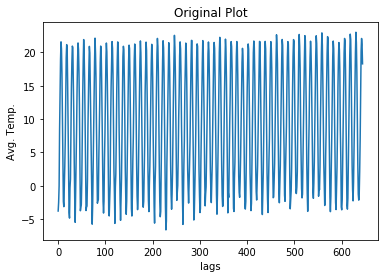

In [23]:
#very simple plotting
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('lags')
ax1.set_ylabel('Avg. Temp.')
ax1.set_title('Original Plot')
ax1.plot('lags', 'AverageTemperature', data = df_USA);

We now visualize acf and pacf plots in the data

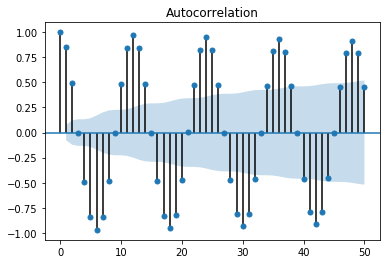

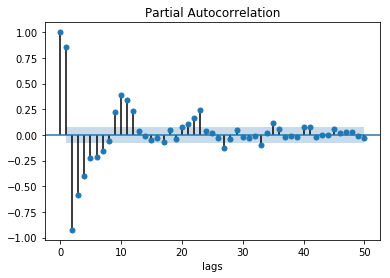

In [24]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_acf(df_USA.AverageTemperature, lags=50)
plot_pacf(df_USA.AverageTemperature, lags=50)
plt.xlabel('lags')
plt.show()

We now check for stationarity in our data using Dicky-Fuller test in the package 'statsmodels.tsa.statto'

In [25]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_USA.AverageTemperature)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.446296
p-value: 0.009478
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569


As we can the p value is quite small and very less than 0.05 the standard threshold, thus we can reject the null hypothesis of the data not being stationary.

Acoording to this test we confirm that our data is stationary. Now our modeling technique is reduced to ARMA model from as we no longer need differencing (I).

Now we move to the modeling part and implement ARMA model
Few things to be noted:
    The ARMA model has two hyperparameters p and q i.e order of AR and MA process respectively that needs to be tuned. This can be decided by viewing ACF and PACF plots for AR and MA process but this will be too tedious as we have about 645 lag values. 
    Thus we use the grid search method to find p and q based on what gives the lowest AIC

In [27]:
from statsmodels.tsa.arima_model import ARMA
import itertools
p = q = range(0, 10)
pq = itertools.product(p, q)
best_score, best_cfg = float("inf"), None
for param in pq:
    try:
        mod = ARMA(df_USA.AverageTemperature,order=param)
        results = mod.fit()
        if results.aic < best_score:
            best_score, best_cfg = results.aic, param
        print('ARMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue
print('Best ARIMA%s AIC=%.3f' % (best_cfg, best_score))

C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(0, 0) - AIC:4652.374057222332
ARMA(0, 1) - AIC:3933.0482104463035


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(0, 5) - AIC:3314.191452950102


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(0, 6) - AIC:3070.8041803233327


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(0, 7) - AIC:2876.1086777421942


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(0, 8) - AIC:2768.7369492454227
ARMA(1, 0) - AIC:3790.5585432632497


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(1, 1) - AIC:3333.0267205348955


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(1, 2) - AIC:3120.904824107231


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(1, 3) - AIC:3474.700201038532


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(1, 4) - AIC:3165.7601709475352


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(1, 5) - AIC:2982.419691589879


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(1, 6) - AIC:2807.846391562969


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(1, 7) - AIC:2724.3367441939627


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(1, 8) - AIC:2722.9499804390225
ARMA(2, 0) - AIC:2528.103800269937


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(2, 2) - AIC:1943.6403711435603
ARMA(2, 3) - AIC:1871.8541674982766


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(2, 4) - AIC:1871.5082386636627


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(3, 0) - AIC:2269.0293368310836


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(3, 2) - AIC:1920.5259322870882


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(3, 3) - AIC:1872.1670139680234
ARMA(3, 4) - AIC:1879.9717931576156


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\j

ARMA(4, 0) - AIC:2143.5856510650206


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(4, 1) - AIC:2087.0460065253974


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(4, 2) - AIC:1869.2064262540648


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(4, 3) - AIC:1867.7701007859193


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\

ARMA(4, 4) - AIC:1872.0738349242686


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(5, 0) - AIC:2113.432534509364


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(5, 1) - AIC:2086.069490447672


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(5, 3) - AIC:1870.489730114089


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171

ARMA(6, 0) - AIC:2082.203067102343


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(6, 1) - AIC:2073.6736726955096


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(6, 3) - AIC:1866.9633274351988


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(6, 4) - AIC:1864.0036197043812


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(7, 0) - AIC:2067.2252958989175


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(7, 1) - AIC:2055.750180059801


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(7, 3) - AIC:1800.7751704675318


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\j

ARMA(8, 0) - AIC:2065.2341184744546


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(8, 1) - AIC:1985.3997544454614


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(8, 2) - AIC:1799.378242698681


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(8, 3) - AIC:1797.8014631923756


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\j

ARMA(9, 0) - AIC:2039.3018319753999


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(9, 1) - AIC:1897.5637823588386


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(9, 3) - AIC:1786.7725963382748


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Best ARIMA(9, 3) AIC=1786.773


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jeyen\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


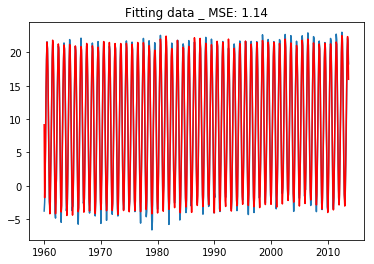

In [30]:
# from the grid search method used above, we were able to find the p and q values that gives lowest AIC as p = 9 and q = 3
# we now use those parameters to fit the model and measure the mean squared error (MSE)

model = ARMA(df_USA.AverageTemperature, order=(9,3))  
results_MA = model.fit()  
plt.plot(df_USA.AverageTemperature)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('Fitting data _ MSE: %.2f'% (((results_MA.fittedvalues-df_USA.AverageTemperature)**2).mean()))
plt.show()

In [37]:
# With the ARMA model fit, we now do some predictions

predictions = results_MA.predict('01/01/2000', '12/01/2025')

In [38]:
predictions

2000-01-01    -2.783313
2000-02-01    -0.966015
2000-03-01     3.832867
2000-04-01     9.499634
2000-05-01    14.797838
2000-06-01    19.398475
2000-07-01    21.502566
2000-08-01    21.086990
2000-09-01    16.971429
2000-10-01    10.132810
2000-11-01     3.652631
2000-12-01    -1.529194
2001-01-01    -3.201321
2001-02-01    -0.573617
2001-03-01     3.574800
2001-04-01     8.594362
2001-05-01    14.188145
2001-06-01    18.699823
2001-07-01    21.327666
2001-08-01    20.450812
2001-09-01    16.250822
2001-10-01     9.929771
2001-11-01     3.376274
2001-12-01    -0.705931
2002-01-01    -2.726229
2002-02-01    -0.431121
2002-03-01     3.372951
2002-04-01     8.768681
2002-05-01    15.102454
2002-06-01    19.598603
                ...    
2023-07-01    21.667399
2023-08-01    20.331169
2023-09-01    15.996039
2023-10-01     9.823846
2023-11-01     3.468653
2023-12-01    -1.366519
2024-01-01    -3.386051
2024-02-01    -2.048899
2024-03-01     2.286460
2024-04-01     8.458129
2024-05-01    14